In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm

In [2]:
N = 10000
mu = 64.
sigma = 3.5

X = np.random.normal(mu, sigma, size=N)
X_obs = X[np.random.randint(0, N, 1000)]

(63.98684761107187, 3.5024458573837247)

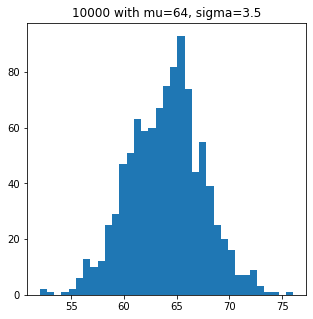

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.hist(X_obs,bins=35)
ax.set_title("10000 with mu=64, sigma=3.5")
mu_obs=X_obs.mean()
(mu_obs, X_obs.std())

In [4]:
transition_model = lambda theta: [theta[0], np.random.normal(theta[1], 0.5)]

def log_like_normal(theta, data):
    
    mu = theta[0]
    sigma = theta[1]
    n = data.size
    
    return np.sum(-np.log(sigma * np.sqrt(2 * np.pi) )-((data-mu)**2) / (2 * sigma ** 2))
    

def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept=np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))

def prior(x):
    if(x[1] <=0):
        return 0
    return 1

def metropolis(transition_model, param_init, iterations, data):
    
    theta = param_init
    accepted = []

    for i in range(iterations):
        theta_new =  transition_model(theta)
        theta_lik = log_like_normal(theta, data)
        theta_new_lik = log_like_normal(theta_new, data) 
        
        if (acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new)))):
            theta = theta_new
            accepted.append(theta_new)            
                
    return np.array(accepted)

In [5]:
theta = np.array([mu_obs, 0.1])

In [6]:
accepted = metropolis(transition_model , theta, 50000, X_obs)
accepted[:,0].mean()
accepted[:,1].mean()

<ipython-input-4-d6a0a2602b2d>:9: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(sigma * np.sqrt(2 * np.pi) )-((data-mu)**2) / (2 * sigma ** 2))
<ipython-input-4-d6a0a2602b2d>:34: RuntimeWarning: divide by zero encountered in log
  if (acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new)))):


3.506580343580387

63.98684761107187 3.506580343580387


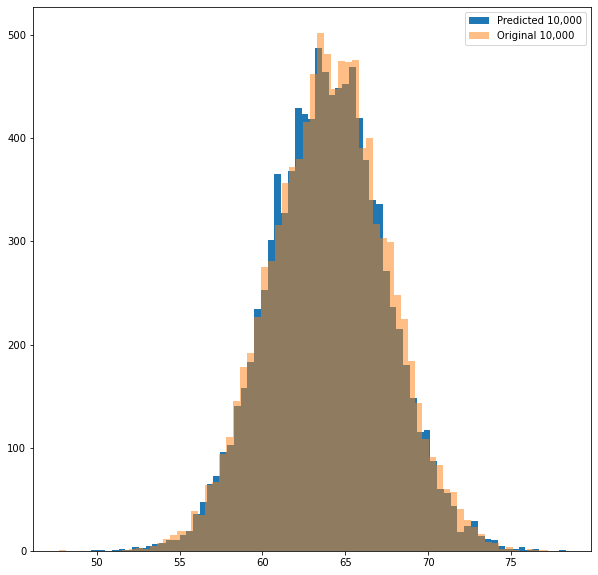

In [7]:
mu = accepted[:,0].mean()
sigma = accepted[:,1].mean()

print(mu, sigma)

model = lambda t,mu,sigma:np.random.normal(mu, sigma, t)
observation_gen=model(X.shape[0], mu, sigma)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.hist( observation_gen, bins=70 ,label="Predicted 10,000")
ax.hist( X,bins=70 ,alpha=0.5, label="Original 10,000")

ax.legend()